In [410]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import wandb
import os

# Plot Wikipedia Dataset

In [411]:
run = wandb.init(job_type="evaluation", project="wiki-workload")
pageview_dir = run.use_artifact('pageviews:latest').download()
questions_dir = run.use_artifact('questions:latest').download()

wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: Downloading large artifact questions:latest, 60.97MB. 2 files... Done. 0:0:0


In [412]:
pageview_df = pd.read_csv(f"{pageview_dir}/pageviews.csv")
pageview_df

,Unnamed: 0,title,edit_count,2021080500,2021080600,2021080700,2021080800,2021080900,2021081000,2021081100,...,2021082800,2021082900,2021083000,2021083100,2021090100,2021090200,2021090300,2021090400,weights,doc_id
0,0,Deaths in 2021,1877,38,35,36,31,349,66,56,...,69,50,63,68,50,52,39,46,0.028511,65984422
1,1,2021 Atlantic hurricane season,1438,11,5,16,8,9,7,14,...,8,20,2,8,5,12,11,5,0.003805,57798785
2,2,Neeraj Chopra,1156,3,7,3,2,4,3,4,...,5,6,0,4,9,2,1,3,0.002170,51150040
3,3,Fall of Kabul (2021),1009,18,9,12,12,16,10,12,...,11,16,9,9,20,15,5,10,0.004876,68481047
4,4,Great Britain at the 2020 Summer Paralympics,989,13,5,6,4,16,8,9,...,3,8,6,8,10,7,4,7,0.003397,60043578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,List of fungi of South Africa,203,8,9,7,13,21,4,9,...,10,7,6,1,13,5,5,6,0.003467,68354495
212,212,Mister Supranational 2021,203,8,9,7,13,21,4,9,...,10,7,6,1,13,5,5,6,0.003467,67918135
213,213,2021–22 FC Barcelona season,202,19,29,29,27,28,27,23,...,21,26,29,16,27,20,43,18,0.012698,67089631
214,214,Hamid Karzai International Airport,201,14,26,15,17,26,14,17,...,19,10,25,13,26,14,22,7,0.007258,487602


<AxesSubplot:>

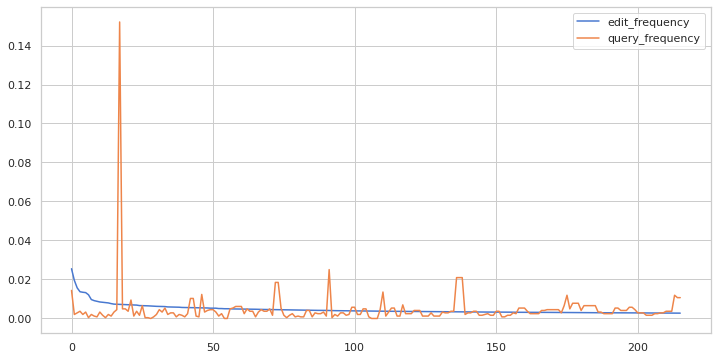

In [413]:
df = pd.DataFrame({
    "edit_frequency": pageview_df.edit_count / pageview_df.edit_count.sum(),
    "query_frequency": pageview_df["2021080600"] / pageview_df["2021080600"].sum()
})

df.plot()

# Plot DPR Model Accuracy Results 

In [414]:
run = wandb.init(job_type="evaluation", project="wiki-workload")
artifact = run.use_artifact('prediction_results:latest')
artifact_dir = artifact.download()

wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [415]:
artifact_dir

'./artifacts/prediction_results:v1997'

In [416]:
artifact_dir = "/home/eecs/wooders/DPR"

In [453]:
constants = [0.01, 0.05]
policies = ["lifo"]
key_policies = ["random", "weighted_random", "round_robin", "weighted_round_robin"]
d = artifact_dir
metric = 'top5'

In [454]:
all_results = {}
for policy in policies: 
    for key_policy in key_policies: 
        scores = []
        name = f"plan-{key_policy}_{policy}-always_process"
        for constant in constants: 
            print(f'{d}/{name}-{constant}-100.json')
            with open(f'{d}/{name}-{constant}-100.json') as results_file:
                results = json.load(results_file)
                scores.append(results[metric])
        all_results[name] = scores
all_results

/home/eecs/wooders/DPR/plan-random_lifo-always_process-0.01-100.json
/home/eecs/wooders/DPR/plan-random_lifo-always_process-0.05-100.json
/home/eecs/wooders/DPR/plan-weighted_random_lifo-always_process-0.01-100.json
/home/eecs/wooders/DPR/plan-weighted_random_lifo-always_process-0.05-100.json
/home/eecs/wooders/DPR/plan-round_robin_lifo-always_process-0.01-100.json
/home/eecs/wooders/DPR/plan-round_robin_lifo-always_process-0.05-100.json
/home/eecs/wooders/DPR/plan-weighted_round_robin_lifo-always_process-0.01-100.json
/home/eecs/wooders/DPR/plan-weighted_round_robin_lifo-always_process-0.05-100.json


{'plan-random_lifo-always_process': [0.41722204591135087, 0.41605839416058393],
 'plan-weighted_random_lifo-always_process': [0.508879315080318,
  0.44467986596668],
 'plan-round_robin_lifo-always_process': [0.5089891784573612,
  0.37384957156458265],
 'plan-weighted_round_robin_lifo-always_process': [0.5088165360077218,
  0.46732741640574116]}

In [ ]:
all_results = {}
for policy in policies: 
    for key_policy in key_policies: 
        scores = []
        name = f"plan-{key_policy}_{policy}-always_process"
        for constant in constants: 
            with open(f'{d}/{name}-{constant}-100.json') as results_file:
                print(f'{d}/{name}-{constant}-100.json')
                results = json.load(results_file)
                scores.append(results[metric])
        all_results[name] = scores
all_results

In [ ]:
all_results.keys()

In [ ]:
plan_weighted_random_lifo = []
for constant in constants:
    with open(f'{d}/plan-weighted_random_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_weighted_random_lifo.append(results[metric])
print(plan_weighted_random_lifo)
        
plan_weighted_longest_queue_lifo = []
for constant in constants:
    with open(f'{d}/plan-weighted_longest_queue_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_weighted_longest_queue_lifo.append(results[metric])
print(plan_weighted_longest_queue_lifo)

plan_longest_queue_lifo = []
for constant in constants:
    with open(f'{d}/plan-longest_queue_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_longest_queue_lifo.append(results[metric])
print(plan_longest_queue_lifo)

plan_random_lifo = []
for constant in constants:
    with open(f'{d}/plan-random_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_random_lifo.append(results[metric])
print(plan_random_lifo)

plan_round_robin_lifo = []
for constant in constants:
    with open(f'{d}/plan-round_robin_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_round_robin_lifo.append(results[metric])
print(plan_round_robin_lifo)


In [421]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

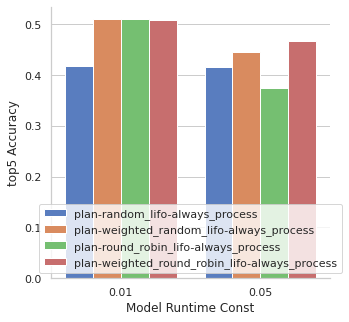

In [455]:
import matplotlib.pyplot as plt
import seaborn
resources = constants 
df = pd.DataFrame({
    'Model Runtime Const': resources, 
    **all_results
})
fig, ax1 = plt.subplots(figsize=(5, 5),)
tidy = df.melt(id_vars='Model Runtime Const').rename(columns=str.title)
seaborn.barplot(x='Model Runtime Const', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.set(xlabel='Model Runtime Const', ylabel=f'{metric} Accuracy')
ax1.legend_.remove()
plt.legend(loc='lower center')
seaborn.despine(fig)

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale('log')
#resources = [10/c for c in constants]
resources = constants 
print(resources)
ax.plot(resources, plan_weighted_longest_queue_lifo, label="LIFO Weighted Queue", c='coral', marker='.')
ax.plot(resources, plan_longest_queue_lifo, label="LIFO Queue", c='coral', marker='.', linestyle='dashed')

ax.plot(resources, plan_weighted_random_lifo, label="LIFO Weighted Random", c='red', marker='.')
ax.plot(resources, plan_random_lifo, label="LIFO Random", c='red', marker='.', linestyle='dashed')

#ax.plot(resources, plan_lifo_sample_half, label="LIFO Sample Half", c='dodgerblue', marker='.', linestyle='dashed')
#ax.plot(resources, plan_lifo_always_process, label="LIFO Always", c='dodgerblue', marker='.')

#ax.plot(resources, plan_round_robin_lifo, label="LIFO Round Robin", c='blue', marker='.', linestyle='dashed')

ax.grid()
ax.set(xlabel='resource constraint', ylabel=f'{metric} accuracy', title='Passage Retriever')
plt.legend()

## Observe how often each key was updated 

In [ ]:
plan_dir = '/data/wooders/wiki-plans'
diff_dir = '/data/wooders/wikipedia/diffs'

In [ ]:
from collections import defaultdict 

def evaluate_plan(plan_file, optimal_file, start_ts=0, end_ts=37000): 
    plan = json.load(open(plan_file))
    optimal_plan = json.load(open(optimal_file))
    

    title_counts = defaultdict(lambda: 0)
    title_counts_opt = defaultdict(lambda: 0)

    for ts in plan.keys(): 
        if float(ts) < start_ts or float(ts) > end_ts: continue 
        for edit in plan[ts]: 
            edit_file = edit[0]
            edit_data = json.load(open(f"{diff_dir}/{edit_file}"))
            title = edit_data['title']
            title_counts[title] += 1
            
    for ts in optimal_plan.keys(): 
        if float(ts) < start_ts or float(ts) > end_ts: continue  
        for edit in optimal_plan[ts]: 
            edit_file = edit[0]
            edit_data = json.load(open(f"{diff_dir}/{edit_file}"))
            title = edit_data['title']
            title_counts_opt[title] += 1
            
    #assert title_counts_opt != title_counts
    
    title_counts_df = pd.DataFrame({"title": title_counts.keys(), "updates": title_counts.values()})
    title_counts_opt_df = pd.DataFrame({"title": title_counts_opt.keys(), "optimal_updates": title_counts_opt.values()})
    
    plan_data_df = title_counts_df.merge(pageview_df, on="title")
    plan_data_df = plan_data_df.merge(title_counts_opt_df, on="title")
    plan_data_df["pageviews"] = plan_data_df["2021090300"]
    return plan_data_df

In [ ]:
plan_names = [
    'plan-weighted_random_lifo-always_process-0.01-100',
    'plan-weighted_random_lifo-always_process-0.1-100'   
]

In [ ]:
results = {}
end_ts = 37000
for plan_name in plan_names:
    print(plan_name)
    plan_file = f'{plan_dir}/{plan_name}.json'
    plan_data_df = evaluate_plan(plan_file, f'/home/eecs/wooders/experiments/wikipedia/optimal_plan.json', end_ts=end_ts)
    results[plan_name] = plan_data_df
    

In [ ]:
results["plan-weighted_random_lifo-always_process-0.1-100"].sort_values(by="updates", ascending=False)

In [ ]:

df1 = results["plan-weighted_random_lifo-always_process-0.01-100"]
df2 = results["plan-weighted_random_lifo-always_process-0.1-100"]
for title in results["plan-weighted_random_lifo-always_process-0.01-100"].title.tolist(): 
    u1 = df1[df1["title"] == title].updates.tolist()
    u2 = df2[df1["title"] == title].updates.tolist()
    if u1 != u2:
        print(title)
        print(u1)
        print(u2)
    
    

In [ ]:
results['plan-round_robin_lifo-always_process-5-100'].set_index("title").sort_values(by="pageviews").head(10)[["updates", "optimal_updates", "pageviews"]].plot(kind="bar",  title="Updates for Least Queried Documents (Round Robin)")

In [ ]:
results['plan-round_robin_lifo-always_process-5-100'].plot(x="pageviews", y="updates", kind="hist")

In [ ]:
results['plan-round_robin_lifo-always_process-5-100'].plot(x="pageviews", y="updates", kind="hist")

In [ ]:
results['plan-round_robin_lifo-always_process-5-100'].plot(x="pageviews", y="optimal_updates", kind="hist")

In [ ]:
optimal_plan_df = evaluate_plan(f'/home/eecs/wooders/experiments/wikipedia/optimal_plan.json', f'/home/eecs/wooders/experiments/wikipedia/optimal_plan.json', end_ts=end_ts)

In [ ]:
n_fits = np.array(range(0, 250, 1)) #optimal_plan_df["updates"].unique()
n_fits.sort()
n_fits_map = {v: i for i, v in enumerate(n_fits)}
n_fits_ticks = {i: v for i, v in enumerate(n_fits)}

In [ ]:
n_fits_map

In [ ]:
import seaborn as sns
import numpy as np
sns.set(style="whitegrid", palette="muted")

In [ ]:
max_fits = 60 

In [ ]:
fig = plt.figure(figsize=(12, 12))
for i, plan_name in enumerate(results.keys()):
    plan_file = f'{plan_dir}/{plan_name}.json'
    plan_data_df = results[plan_name]
    plt.subplot(4, 2, i + 1)
    #plan, loss = run_lp(df, max_n_fits=max_n_fits)
    #arr = np.array([(key, n_fits_map[fits]) for (key, fits) in plan.items()])
    vals = plan_data_df["updates"].tolist()
    arr = np.array([(i, vals[i]) for i in range(len(vals))])
    plt.scatter(arr[:, 0], arr[:, 1], label=max_n_fits)
    plt.yticks(ticks=list(n_fits_ticks.keys()), labels=list(n_fits_ticks.values()))
    plt.xlabel("key")
    plt.ylabel("n_fits")
    plt.legend()
    plt.title(plan_name)
plt.suptitle("Sample plan selection")
plt.tight_layout()

In [ ]:
df = pd.read_csv("/data/wooders/wikipedia/questions.csv")
#df.columns = ["question", "answer", "doc_id", "timestamp", "revid", "oldrevid"]

In [ ]:
df

In [ ]:
df.doc_id.value_counts()

In [ ]:
df.question.value_counts()

In [ ]:
df.doc_id.value_counts()

In [ ]:
weights = df.doc_id.value_counts().to_dict()

In [ ]:
for key in weights: 
    weights[key] = int(weights[key]/10)
    if weights[key] == 0: 
        weights[key] = 1

In [ ]:
weights

In [ ]:
open("/home/eecs/wooders/experiments/wikipedia/weights.json", "w").write(json.dumps(weights))